In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Load and tokenize text
try:
    with open("short_story.txt", 'r', encoding="utf-8") as f:
        data = f.read()
except FileNotFoundError:
    print("File not found")
    data = "Once upon a time there was a wise fox who lived in the forest"



In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

# Prepare input sequences using n-grams
input_sequences = []
for line in data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram = token_list[:i+1]
        input_sequences.append(n_gram)

max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = to_categorical(labels, num_classes=total_words)



In [4]:
# Model builder
def build_seq2seq_model(cell_type='RNN'):
    input_layer = Input(shape=(max_len - 1,))
    x = Embedding(total_words, 10)(input_layer)

    if cell_type == 'RNN':
        x = SimpleRNN(128)(x)
    elif cell_type == 'LSTM':
        x = LSTM(128)(x)
    elif cell_type == 'GRU':
        x = GRU(128)(x)

    output_layer = Dense(total_words, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [5]:
# Train and evaluate models
def train_model(model):
    es = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    history = model.fit(xs, ys, epochs=100, verbose=1, callbacks=[es])
    return history



In [6]:
model_rnn = build_seq2seq_model('RNN')
history_rnn = train_model(model_rnn)



Epoch 1/100
6/6 [==============================] - 4s 23ms/step - loss: 4.9397 - accuracy: 0.0476
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 4.8588 - accuracy: 0.0899
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 4.7239 - accuracy: 0.0899
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 4.6620 - accuracy: 0.0899
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 4.6108 - accuracy: 0.0899
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 4.5826 - accuracy: 0.0899
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 4.5368 - accuracy: 0.0899
Epoch 8/100
6/6 [==============================] - 0s 20ms/step - loss: 4.5125 - accuracy: 0.0952
Epoch 9/100
6/6 [==============================] - 0s 19ms/step - loss: 4.4692 - accuracy: 0.0899
Epoch 10/100
6/6 [==============================] - 0s 20ms/step - loss: 4.4136 - accuracy: 0.1005
Epoch 11/100
6/6 [=

In [7]:
model_lstm = build_seq2seq_model('LSTM')
history_lstm = train_model(model_lstm)



Epoch 1/100
6/6 [==============================] - 5s 12ms/step - loss: 4.9416 - accuracy: 0.0476
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 4.9315 - accuracy: 0.0899
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 4.9157 - accuracy: 0.0899
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 4.8428 - accuracy: 0.0899
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 4.7596 - accuracy: 0.0899
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 4.6501 - accuracy: 0.0899
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 4.6454 - accuracy: 0.0899
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 4.6230 - accuracy: 0.0899
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 4.6215 - accuracy: 0.0899
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 4.6020 - accuracy: 0.0899
Epoch 11/100
6/6 [===

In [8]:
model_gru = build_seq2seq_model('GRU')
history_gru = train_model(model_gru)



Epoch 1/100
6/6 [==============================] - 3s 13ms/step - loss: 4.9403 - accuracy: 0.0688
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 4.9272 - accuracy: 0.0899
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 4.9073 - accuracy: 0.0899
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 4.8516 - accuracy: 0.0899
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 4.7308 - accuracy: 0.0899
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 4.6765 - accuracy: 0.0899
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 4.6759 - accuracy: 0.0899
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 4.6403 - accuracy: 0.0899
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 4.6105 - accuracy: 0.0899
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 4.6019 - accuracy: 0.0899
Epoch 11/100
6/6 [=======

In [9]:
# Prediction function
def predict_next_words(model, seed_text, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
        seed_text += ' ' + predicted_word
    return seed_text

print(predict_next_words(model_rnn, "Once upon", next_words=5))
print(predict_next_words(model_lstm, "Once upon", next_words=5))
print(predict_next_words(model_gru, "Once upon", next_words=5))

# Evaluate
print("RNN Accuracy:", model_rnn.evaluate(xs, ys, verbose=0)[1])
print("LSTM Accuracy:", model_lstm.evaluate(xs, ys, verbose=0)[1])
print("GRU Accuracy:", model_gru.evaluate(xs, ys, verbose=0)[1])



Once upon a voice echoed behind him
Once upon his his his his his
Once upon he pulled his cloak and
RNN Accuracy: 0.9576719403266907
LSTM Accuracy: 0.44973546266555786
GRU Accuracy: 0.9629629850387573


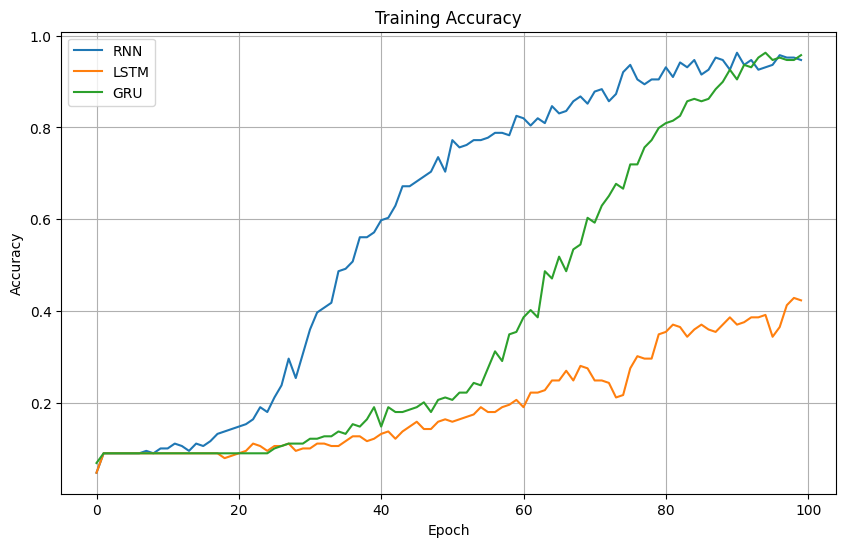

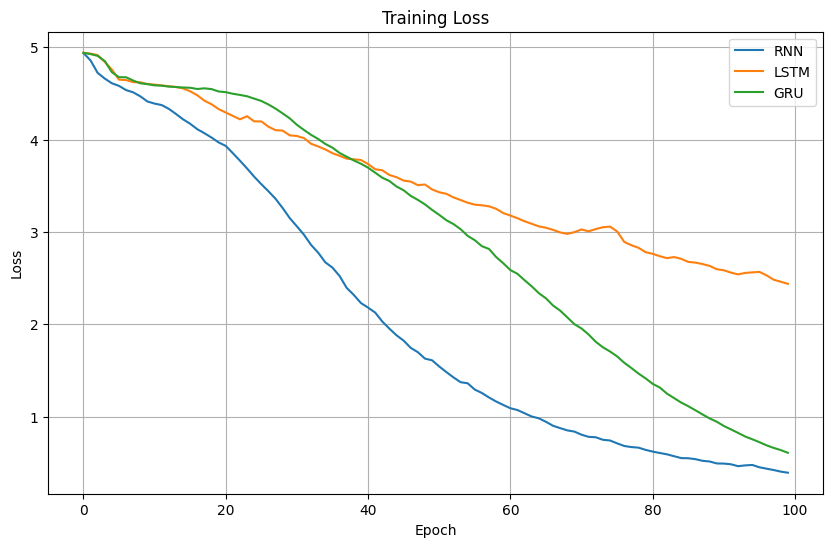

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN')
plt.plot(history_lstm.history['accuracy'], label='LSTM')
plt.plot(history_gru.history['accuracy'], label='GRU')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['loss'], label='RNN')
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_gru.history['loss'], label='GRU')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
